In [103]:
import os
from cmdstanpy import CmdStanModel
import cmdstanpy
import pandas as pd
import src.etl as etl
from tabulate import tabulate

In [2]:
stan_file = "model.stan"

In [3]:
model = CmdStanModel(stan_file=stan_file)

14:23:57 - cmdstanpy - INFO - compiling stan file /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpgbp_9opj/tmpitfji2qo.stan to exe file /Users/bwieland/Desktop/Personal Work/efl-forecasting/model
INFO:cmdstanpy:compiling stan file /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpgbp_9opj/tmpitfji2qo.stan to exe file /Users/bwieland/Desktop/Personal Work/efl-forecasting/model
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=model.stan /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpgbp_9opj/tmpitfji2qo
cwd: /Users/bwieland/.cmdstan/cmdstan-2.35.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=model.stan --o=/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpgbp_9opj/tmpitfji2qo.hpp /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpgbp_9opj/tmpitfji2qo.stan

--- Compiling C++ code ---
clang++ -std=c++17 -Wno-unknown-warning-option -Wno-tautological-compare -Wno-sign-compare -D_REENTRANT -ffp-contract=off -Wno-i

In [4]:
raw_data = pd.read_csv("match_data.csv")
model_data, coords = etl.format_data_for_stan(input_df=raw_data)

In [5]:
fit = model.sample(data=model_data)

DEBUG:cmdstanpy:cmd: /Users/bwieland/Desktop/Personal Work/efl-forecasting/model info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/bxu9cd_x.json
14:24:04 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/bwieland/Desktop/Personal Work/efl-forecasting/model', 'id=1', 'random', 'seed=98256', 'data', 'file=/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/bxu9cd_x.json', 'output', 'file=/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_thre


14:26:53 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/bwieland/Desktop/Personal Work/efl-forecasting/model', 'id=1', 'random', 'seed=98256', 'data', 'file=/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/bxu9cd_x.json', 'output', 'file=/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_1.csv
 console_msgs (if any):
	/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (

In [11]:
fit.stan_variable('home_xg_intercept').mean()

1.4826814425000001

In [13]:
fit.stan_variable('away_xg_intercept').mean()

1.214342885

In [14]:
fit.summary()

DEBUG:cmdstanpy:cmd: /Users/bwieland/.cmdstan/cmdstan-2.35.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/stansummary-model-ho8ievxt.csv /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_1.csv /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_2.csv /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_3.csv /var/folders/6z/m6pqtw5n2rl3vc_6wz5xk8280000gp/T/tmpzeyoqbyz/modelc5kjkshj/model-20241118142404_4.csv
cwd: None


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-3920.480000,210.850000,332.361000,-4307.650000,-4050.610000,-3349.710000,2.48470,0.011971,2.52536
"theta_off[1,1]",0.218047,0.061685,0.186960,-0.085147,0.222881,0.527593,9.18633,0.044258,1.14899
"theta_off[1,2]",0.564115,0.135540,0.296936,0.017122,0.617365,0.977483,4.79947,0.023123,1.36851
"theta_off[1,3]",0.577704,0.146887,0.318661,0.003876,0.633432,1.042850,4.70641,0.022675,1.37052
"theta_off[1,4]",0.385895,0.121102,0.318915,-0.093998,0.391716,0.911973,6.93501,0.033411,1.21137
...,...,...,...,...,...,...,...,...,...
sigma_def_xg,0.139860,0.045060,0.081480,0.023590,0.138090,0.263250,3.26909,0.015750,1.73733
home_xg_intercept,1.482680,0.001510,0.045580,1.408270,1.482810,1.556870,906.49496,4.367300,1.00271
away_xg_intercept,1.214340,0.001530,0.044680,1.140590,1.214780,1.288720,853.84881,4.113670,1.00336
gamma_theta,0.624990,0.108260,0.241190,0.136720,0.691710,0.927870,4.96347,0.023910,1.37054


In [68]:
ortg = fit.stan_variable('theta_off')
drtg = fit.stan_variable('theta_def')
orho = fit.stan_variable('rho_off')
drho = fit.stan_variable('rho_def')

# Chain/draw * team * season

In [118]:
full_df = pd.DataFrame()

for season in range(len(coords['seasons'])):
    team_season_ortg = ortg[:, :, season].mean(axis=0)
    team_season_drtg = drtg[:, :, season].mean(axis=0)
    team_season_orho = orho[:, :, season].mean(axis=0)
    team_season_drho = drho[:, :, season].mean(axis=0)


    team_season_nrtg = team_season_ortg + team_season_drtg + team_season_orho + team_season_drho
    season = coords['seasons'][season]

    season_df = pd.DataFrame({'ortg' : team_season_ortg + team_season_orho, 
                              'drtg' : team_season_drtg + team_season_drho, 
                              'nrtg' : team_season_nrtg, 
                              'season' : season}).set_index(coords['teams']).reset_index()
    full_df = pd.concat([full_df, season_df], ignore_index=True)

full_df = full_df.rename(columns={'index' : 'team'})

## 2024 sorted rankings

In [119]:
champo_teams = raw_data.query('season==2024 & league=="Championship"')['home_team'].unique()

In [120]:
ratings_24 = full_df.query('season == 2024').sort_values('nrtg',ascending=False).set_index('team')

In [128]:
champo_ratings_24 = ratings_24[ratings_24.index.isin(champo_teams)]

pretty_ratings = champo_ratings_24[['ortg', 'drtg', 'nrtg']].round(3).reset_index()

In [129]:
print(tabulate(pretty_ratings, headers=['Team', 'Off Rtg', 'Def Rtg', 'Net Rtg'], tablefmt='pipe'))

|    | Team            |   Off Rtg |   Def Rtg |   Net Rtg |
|---:|:----------------|----------:|----------:|----------:|
|  0 | Leeds United    |     0.169 |     0.312 |     0.48  |
|  1 | Sunderland      |     0.048 |     0.297 |     0.345 |
|  2 | Burnley         |    -0.078 |     0.31  |     0.232 |
|  3 | West Brom       |    -0.114 |     0.308 |     0.194 |
|  4 | Sheffield Utd   |    -0.119 |     0.222 |     0.103 |
|  5 | Middlesbrough   |     0.071 |     0.017 |     0.088 |
|  6 | Norwich City    |     0.175 |    -0.119 |     0.056 |
|  7 | Watford         |     0.108 |    -0.115 |    -0.006 |
|  8 | Millwall        |    -0.19  |     0.154 |    -0.037 |
|  9 | Derby County    |    -0.07  |     0.016 |    -0.054 |
| 10 | Oxford United   |    -0.076 |    -0.017 |    -0.093 |
| 11 | Swansea City    |    -0.319 |     0.224 |    -0.095 |
| 12 | Coventry City   |    -0.011 |    -0.096 |    -0.107 |
| 13 | Bristol City    |    -0.06  |    -0.084 |    -0.144 |
| 14 | Blackburn       |

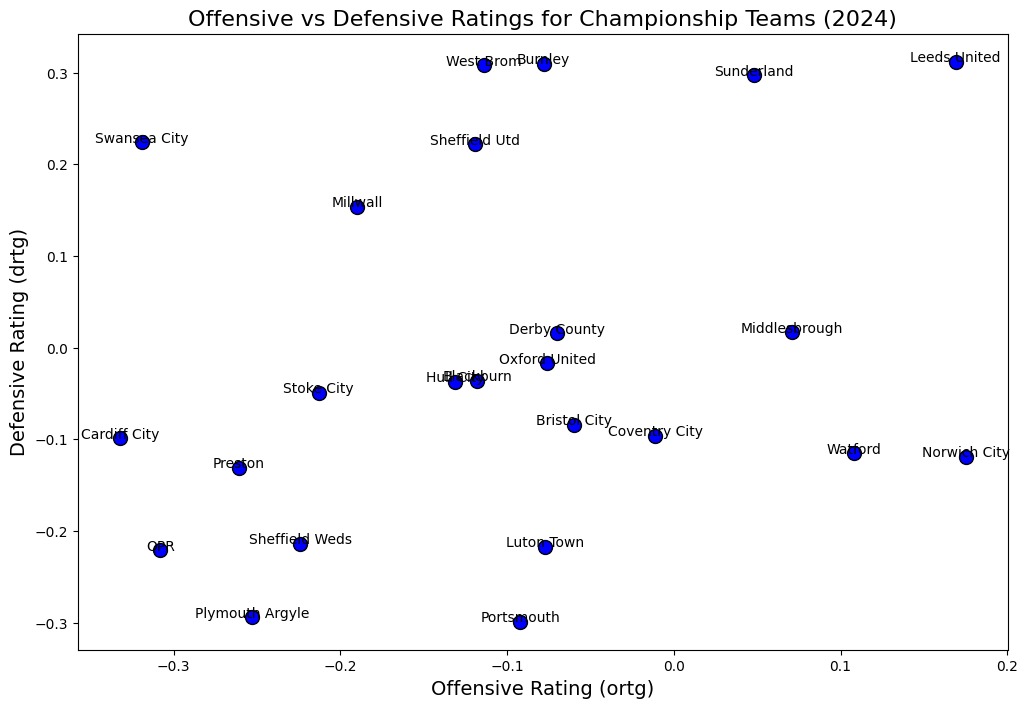

In [135]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 8))
plt.scatter(pretty_ratings['ortg'], pretty_ratings['drtg'], color='blue', edgecolor='k', s=100)

for i, team in enumerate(pretty_ratings['team']):
    plt.text(pretty_ratings['ortg'][i], pretty_ratings['drtg'][i], team, fontsize=10, ha='center')

plt.xlabel('Offensive Rating (ortg)', fontsize=14)
plt.ylabel('Defensive Rating (drtg)', fontsize=14)
plt.title('Offensive vs Defensive Ratings for Championship Teams (2024)', fontsize=16)
plt.grid(False)
plt.show()